## Binary Clustering - Classification of Iron Microstructure Images

The purpose of this model is to segregate images into clusters and classify them according to their visual characteristics. The dataset is composed of gray and ductile cast iron microstructure images. Each specimen has different chemical composition and has been subjected to different metallurgical treatments. The images and the samples were prepared and collected using different methods and techniques. The clustering process will use the K-means clustering algorithm, and will take advantage of the transfer learning process available from the ImageNet database to improve performance and generalization. The dataset was collected online from diferent sources using the google search engine.

### Import Libraries

In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans

import shutil
import os
import cv2

import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from sklearn import metrics

from os import listdir
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score

import warnings
warnings.filterwarnings("ignore")

### Microstructure characteristics of Gray and Ductile cast iron

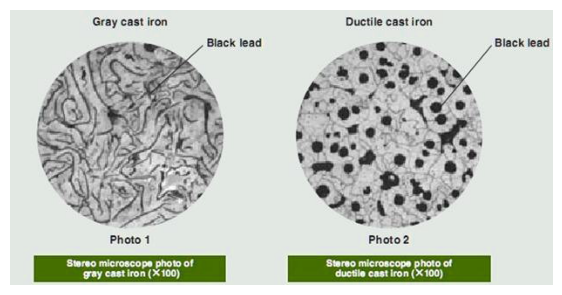

In [2]:
fig = plt.figure(figsize=(7, 6))
Image1 = cv2.imread('cast_iron_microstructure.jpg')
plt.imshow(Image1)
plt.axis('off');

### Delete Corrupted Images

In [3]:
num_skipped = 0

folder_path = os.path.join('ferro_images')
for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)
    try:
        fobj = open(fpath, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
    finally:
        fobj.close()

    if not is_jfif:
        num_skipped += 1
        # Delete corrupted image
        os.remove(fpath)

print("Deleted images:",num_skipped)

total_ferro_images = 0 
folder_dir = "ferro_images/"
for images in os.listdir(folder_dir):
    total_ferro_images = total_ferro_images + 1 
print("Total images left:",total_ferro_images)

Deleted images: 0
Total images left: 128


### Display the first four images of the dataset

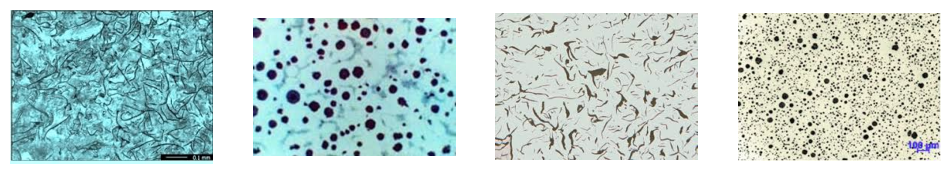

In [4]:
fig = plt.figure(figsize=(12, 8))
rows = 1
columns = 4
Image1 = cv2.imread('ferro_images/1.jpg')
Image2 = cv2.imread('ferro_images/2.jpg')
Image3 = cv2.imread('ferro_images/3.jpg')
Image4 = cv2.imread('ferro_images/4.jpg')

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')
fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.axis('off');

Where the first and third images are ductile iron, and the second and fourth images are gray cast iron.

### Feature extraction

In [5]:
# Function to Extract features from the images
def image_feature(direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname='ferro_images'+'/'+i
        img=image.load_img(fname,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

### k-Means clustering

In [6]:
img_path=os.listdir('ferro_images')
img_features,img_name=image_feature(img_path)
clusters = KMeans(2, random_state = 40)
clusters.fit(img_features);

  0%|          | 0/128 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  1%|          | 1/128 [00:02<04:57,  2.35s/it]

1/1 [==============================] - 0s 162ms/step


  2%|▏         | 2/128 [00:02<02:18,  1.10s/it]

1/1 [==============================] - 0s 158ms/step


  2%|▏         | 3/128 [00:02<01:27,  1.43it/s]

1/1 [==============================] - 0s 150ms/step


  3%|▎         | 4/128 [00:03<01:02,  1.98it/s]

1/1 [==============================] - 0s 157ms/step


  4%|▍         | 5/128 [00:03<00:49,  2.49it/s]

1/1 [==============================] - 0s 144ms/step


  5%|▍         | 6/128 [00:03<00:40,  2.99it/s]

1/1 [==============================] - 0s 148ms/step


  5%|▌         | 7/128 [00:03<00:35,  3.43it/s]

1/1 [==============================] - 0s 144ms/step


  6%|▋         | 8/128 [00:03<00:31,  3.80it/s]

1/1 [==============================] - 0s 143ms/step


  7%|▋         | 9/128 [00:04<00:29,  4.08it/s]

1/1 [==============================] - 0s 146ms/step


  8%|▊         | 10/128 [00:04<00:27,  4.30it/s]

1/1 [==============================] - 0s 143ms/step


  9%|▊         | 11/128 [00:04<00:26,  4.48it/s]

1/1 [==============================] - 0s 171ms/step


  9%|▉         | 12/128 [00:04<00:26,  4.39it/s]

1/1 [==============================] - 0s 161ms/step


 10%|█         | 13/128 [00:04<00:26,  4.42it/s]

1/1 [==============================] - 0s 145ms/step


 11%|█         | 14/128 [00:05<00:25,  4.53it/s]

1/1 [==============================] - 0s 148ms/step


 12%|█▏        | 15/128 [00:05<00:24,  4.62it/s]

1/1 [==============================] - 0s 145ms/step


 12%|█▎        | 16/128 [00:05<00:23,  4.70it/s]

1/1 [==============================] - 0s 141ms/step


 13%|█▎        | 17/128 [00:05<00:23,  4.77it/s]

1/1 [==============================] - 0s 147ms/step


 14%|█▍        | 18/128 [00:05<00:22,  4.81it/s]

1/1 [==============================] - 0s 145ms/step


 15%|█▍        | 19/128 [00:06<00:22,  4.84it/s]

1/1 [==============================] - 0s 148ms/step


 16%|█▌        | 20/128 [00:06<00:22,  4.89it/s]

1/1 [==============================] - 0s 147ms/step


 16%|█▋        | 21/128 [00:06<00:21,  4.88it/s]

1/1 [==============================] - 0s 146ms/step


 17%|█▋        | 22/128 [00:06<00:21,  4.86it/s]

1/1 [==============================] - 0s 146ms/step


 18%|█▊        | 23/128 [00:06<00:21,  4.87it/s]

1/1 [==============================] - 0s 145ms/step


 19%|█▉        | 24/128 [00:07<00:21,  4.92it/s]

1/1 [==============================] - 0s 146ms/step


 20%|█▉        | 25/128 [00:07<00:20,  4.93it/s]

1/1 [==============================] - 0s 144ms/step


 20%|██        | 26/128 [00:07<00:20,  4.92it/s]

1/1 [==============================] - 0s 146ms/step


 21%|██        | 27/128 [00:07<00:20,  4.86it/s]

1/1 [==============================] - 0s 146ms/step


 22%|██▏       | 28/128 [00:07<00:20,  4.89it/s]

1/1 [==============================] - 0s 148ms/step


 23%|██▎       | 29/128 [00:08<00:20,  4.89it/s]

1/1 [==============================] - 0s 147ms/step


 23%|██▎       | 30/128 [00:08<00:20,  4.85it/s]

1/1 [==============================] - 0s 157ms/step


 24%|██▍       | 31/128 [00:08<00:20,  4.82it/s]

1/1 [==============================] - 0s 147ms/step


 25%|██▌       | 32/128 [00:08<00:19,  4.87it/s]

1/1 [==============================] - 0s 149ms/step


 26%|██▌       | 33/128 [00:09<00:19,  4.85it/s]

1/1 [==============================] - 0s 177ms/step


 27%|██▋       | 34/128 [00:09<00:20,  4.68it/s]

1/1 [==============================] - 0s 200ms/step


 27%|██▋       | 35/128 [00:09<00:21,  4.40it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 36/128 [00:09<00:21,  4.21it/s]

1/1 [==============================] - 0s 182ms/step


 29%|██▉       | 37/128 [00:09<00:21,  4.23it/s]

1/1 [==============================] - 0s 189ms/step


 30%|██▉       | 38/128 [00:10<00:21,  4.19it/s]

1/1 [==============================] - 0s 187ms/step


 30%|███       | 39/128 [00:10<00:21,  4.13it/s]

1/1 [==============================] - 0s 205ms/step


 31%|███▏      | 40/128 [00:10<00:21,  4.03it/s]

1/1 [==============================] - 0s 187ms/step


 32%|███▏      | 41/128 [00:10<00:21,  4.06it/s]

1/1 [==============================] - 0s 180ms/step


 33%|███▎      | 42/128 [00:11<00:21,  4.08it/s]

1/1 [==============================] - 0s 181ms/step


 34%|███▎      | 43/128 [00:11<00:20,  4.10it/s]

1/1 [==============================] - 0s 203ms/step


 34%|███▍      | 44/128 [00:11<00:20,  4.01it/s]

1/1 [==============================] - 0s 151ms/step


 35%|███▌      | 45/128 [00:11<00:19,  4.23it/s]

1/1 [==============================] - 0s 147ms/step


 36%|███▌      | 46/128 [00:12<00:18,  4.43it/s]

1/1 [==============================] - 0s 145ms/step


 37%|███▋      | 47/128 [00:12<00:17,  4.57it/s]

1/1 [==============================] - 0s 146ms/step


 38%|███▊      | 48/128 [00:12<00:16,  4.71it/s]

1/1 [==============================] - 0s 145ms/step


 38%|███▊      | 49/128 [00:12<00:16,  4.77it/s]

1/1 [==============================] - 0s 142ms/step


 39%|███▉      | 50/128 [00:12<00:16,  4.86it/s]

1/1 [==============================] - 0s 146ms/step


 40%|███▉      | 51/128 [00:13<00:15,  4.89it/s]

1/1 [==============================] - 0s 144ms/step


 41%|████      | 52/128 [00:13<00:15,  4.92it/s]

1/1 [==============================] - 0s 147ms/step


 41%|████▏     | 53/128 [00:13<00:15,  4.94it/s]

1/1 [==============================] - 0s 148ms/step


 42%|████▏     | 54/128 [00:13<00:14,  4.95it/s]

1/1 [==============================] - 0s 145ms/step


 43%|████▎     | 55/128 [00:13<00:14,  4.99it/s]

1/1 [==============================] - 0s 144ms/step


 44%|████▍     | 56/128 [00:14<00:14,  4.99it/s]

1/1 [==============================] - 0s 144ms/step


 45%|████▍     | 57/128 [00:14<00:14,  4.97it/s]

1/1 [==============================] - 0s 144ms/step


 45%|████▌     | 58/128 [00:14<00:14,  4.99it/s]

1/1 [==============================] - 0s 145ms/step


 46%|████▌     | 59/128 [00:14<00:13,  5.01it/s]

1/1 [==============================] - 0s 146ms/step


 47%|████▋     | 60/128 [00:14<00:13,  5.00it/s]

1/1 [==============================] - 0s 147ms/step


 48%|████▊     | 61/128 [00:15<00:13,  4.99it/s]

1/1 [==============================] - 0s 146ms/step


 48%|████▊     | 62/128 [00:15<00:13,  4.99it/s]

1/1 [==============================] - 0s 145ms/step


 49%|████▉     | 63/128 [00:15<00:13,  4.97it/s]

1/1 [==============================] - 0s 147ms/step


 50%|█████     | 64/128 [00:15<00:12,  4.97it/s]

1/1 [==============================] - 0s 144ms/step


 51%|█████     | 65/128 [00:15<00:12,  4.98it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 66/128 [00:16<00:12,  4.97it/s]

1/1 [==============================] - 0s 147ms/step


 52%|█████▏    | 67/128 [00:16<00:12,  4.98it/s]

1/1 [==============================] - 0s 144ms/step


 53%|█████▎    | 68/128 [00:16<00:12,  4.98it/s]

1/1 [==============================] - 0s 155ms/step


 54%|█████▍    | 69/128 [00:16<00:12,  4.88it/s]

1/1 [==============================] - 0s 147ms/step


 55%|█████▍    | 70/128 [00:16<00:11,  4.92it/s]

1/1 [==============================] - 0s 149ms/step


 55%|█████▌    | 71/128 [00:17<00:11,  4.92it/s]

1/1 [==============================] - 0s 148ms/step


 56%|█████▋    | 72/128 [00:17<00:11,  4.94it/s]

1/1 [==============================] - 0s 148ms/step


 57%|█████▋    | 73/128 [00:17<00:11,  4.93it/s]

1/1 [==============================] - 0s 149ms/step


 58%|█████▊    | 74/128 [00:17<00:10,  4.93it/s]

1/1 [==============================] - 0s 149ms/step


 59%|█████▊    | 75/128 [00:17<00:10,  4.93it/s]

1/1 [==============================] - 0s 149ms/step


 59%|█████▉    | 76/128 [00:18<00:10,  4.90it/s]

1/1 [==============================] - 0s 145ms/step


 60%|██████    | 77/128 [00:18<00:10,  4.94it/s]

1/1 [==============================] - 0s 149ms/step


 61%|██████    | 78/128 [00:18<00:10,  4.93it/s]

1/1 [==============================] - 0s 145ms/step


 62%|██████▏   | 79/128 [00:18<00:09,  4.96it/s]

1/1 [==============================] - 0s 146ms/step


 62%|██████▎   | 80/128 [00:18<00:09,  5.00it/s]

1/1 [==============================] - 0s 146ms/step


 63%|██████▎   | 81/128 [00:19<00:09,  4.95it/s]

1/1 [==============================] - 0s 157ms/step


 64%|██████▍   | 82/128 [00:19<00:09,  4.89it/s]

1/1 [==============================] - 0s 165ms/step


 65%|██████▍   | 83/128 [00:19<00:09,  4.77it/s]

1/1 [==============================] - 0s 149ms/step


 66%|██████▌   | 84/128 [00:19<00:09,  4.82it/s]

1/1 [==============================] - 0s 144ms/step


 66%|██████▋   | 85/128 [00:20<00:08,  4.85it/s]

1/1 [==============================] - 0s 146ms/step


 67%|██████▋   | 86/128 [00:20<00:08,  4.93it/s]

1/1 [==============================] - 0s 145ms/step


 68%|██████▊   | 87/128 [00:20<00:08,  4.91it/s]

1/1 [==============================] - 0s 153ms/step


 69%|██████▉   | 88/128 [00:20<00:08,  4.88it/s]

1/1 [==============================] - 0s 147ms/step


 70%|██████▉   | 89/128 [00:20<00:07,  4.93it/s]

1/1 [==============================] - 0s 144ms/step


 70%|███████   | 90/128 [00:21<00:07,  4.95it/s]

1/1 [==============================] - 0s 148ms/step


 71%|███████   | 91/128 [00:21<00:07,  4.95it/s]

1/1 [==============================] - 0s 145ms/step


 72%|███████▏  | 92/128 [00:21<00:07,  4.99it/s]

1/1 [==============================] - 0s 148ms/step


 73%|███████▎  | 93/128 [00:21<00:07,  4.95it/s]

1/1 [==============================] - 0s 144ms/step


 73%|███████▎  | 94/128 [00:21<00:06,  4.95it/s]

1/1 [==============================] - 0s 147ms/step


 74%|███████▍  | 95/128 [00:22<00:06,  4.97it/s]

1/1 [==============================] - 0s 149ms/step


 75%|███████▌  | 96/128 [00:22<00:06,  4.97it/s]

1/1 [==============================] - 0s 146ms/step


 76%|███████▌  | 97/128 [00:22<00:06,  4.99it/s]

1/1 [==============================] - 0s 150ms/step


 77%|███████▋  | 98/128 [00:22<00:06,  4.95it/s]

1/1 [==============================] - 0s 165ms/step


 77%|███████▋  | 99/128 [00:22<00:06,  4.79it/s]

1/1 [==============================] - 0s 150ms/step


 78%|███████▊  | 100/128 [00:23<00:05,  4.80it/s]

1/1 [==============================] - 0s 150ms/step


 79%|███████▉  | 101/128 [00:23<00:05,  4.81it/s]

1/1 [==============================] - 0s 152ms/step


 80%|███████▉  | 102/128 [00:23<00:05,  4.81it/s]

1/1 [==============================] - 0s 155ms/step


 80%|████████  | 103/128 [00:23<00:05,  4.76it/s]

1/1 [==============================] - 0s 157ms/step


 81%|████████▏ | 104/128 [00:23<00:05,  4.78it/s]

1/1 [==============================] - 0s 150ms/step


 82%|████████▏ | 105/128 [00:24<00:04,  4.76it/s]

1/1 [==============================] - 0s 154ms/step


 83%|████████▎ | 106/128 [00:24<00:04,  4.73it/s]

1/1 [==============================] - 0s 169ms/step


 84%|████████▎ | 107/128 [00:24<00:04,  4.63it/s]

1/1 [==============================] - 0s 155ms/step


 84%|████████▍ | 108/128 [00:24<00:04,  4.66it/s]

1/1 [==============================] - 0s 154ms/step


 85%|████████▌ | 109/128 [00:24<00:04,  4.69it/s]

1/1 [==============================] - 0s 194ms/step


 86%|████████▌ | 110/128 [00:25<00:04,  4.48it/s]

1/1 [==============================] - 0s 195ms/step


 87%|████████▋ | 111/128 [00:25<00:03,  4.28it/s]

1/1 [==============================] - 0s 193ms/step


 88%|████████▊ | 112/128 [00:25<00:03,  4.16it/s]

1/1 [==============================] - 0s 183ms/step


 88%|████████▊ | 113/128 [00:25<00:03,  4.18it/s]

1/1 [==============================] - 0s 200ms/step


 89%|████████▉ | 114/128 [00:26<00:03,  4.08it/s]

1/1 [==============================] - 0s 195ms/step


 90%|████████▉ | 115/128 [00:26<00:03,  4.05it/s]

1/1 [==============================] - 0s 198ms/step


 91%|█████████ | 116/128 [00:26<00:02,  4.02it/s]

1/1 [==============================] - 0s 192ms/step


 91%|█████████▏| 117/128 [00:27<00:02,  3.97it/s]

1/1 [==============================] - 0s 180ms/step


 92%|█████████▏| 118/128 [00:27<00:02,  4.06it/s]

1/1 [==============================] - 0s 170ms/step


 93%|█████████▎| 119/128 [00:27<00:02,  4.14it/s]

1/1 [==============================] - 0s 171ms/step


 94%|█████████▍| 120/128 [00:27<00:01,  4.22it/s]

1/1 [==============================] - 0s 182ms/step


 95%|█████████▍| 121/128 [00:27<00:01,  4.17it/s]

1/1 [==============================] - 0s 146ms/step


 95%|█████████▌| 122/128 [00:28<00:01,  4.38it/s]

1/1 [==============================] - 0s 147ms/step


 96%|█████████▌| 123/128 [00:28<00:01,  4.52it/s]

1/1 [==============================] - 0s 146ms/step


 97%|█████████▋| 124/128 [00:28<00:00,  4.66it/s]

1/1 [==============================] - 0s 146ms/step


 98%|█████████▊| 125/128 [00:28<00:00,  4.75it/s]

1/1 [==============================] - 0s 157ms/step


 98%|█████████▊| 126/128 [00:28<00:00,  4.77it/s]

1/1 [==============================] - 0s 147ms/step


 99%|█████████▉| 127/128 [00:29<00:00,  4.76it/s]

1/1 [==============================] - 0s 148ms/step


100%|██████████| 128/128 [00:29<00:00,  4.36it/s]


### Clusters identification

In [7]:
image_cluster = pd.DataFrame(img_name,columns=['image'])
image_cluster["clusterid"] = clusters.labels_
image_cluster.head(5)

,image,clusterid
0,1.jpg,1
1,10.jpg,0
2,100.jpg,1
3,102.jpg,1
4,103.jpg,1


### Seperate files into clusters

In [8]:
os.mkdir('ductile')
os.mkdir('gray')
for i in range(len(image_cluster)):
    if image_cluster['clusterid'][i]==0:
        shutil.move(os.path.join('ferro_images', image_cluster['image'][i]), 'ductile')
    else:
        shutil.move(os.path.join('ferro_images', image_cluster['image'][i]), 'gray')

### Matrix calculations

In [9]:
total_true_ductile = 0 
folder_dir = "iron_img/true_ductile/"
for images in os.listdir(folder_dir):
    total_true_ductile = total_true_ductile + 1

total_true_gray = 0 
folder_dir = "iron_img/true_gray/"
for images in os.listdir(folder_dir):
    total_true_gray = total_true_gray + 1

correct_predicted_ductile = 0 
folder_dir1 = "iron_img/true_ductile/"
folder_dir2 = "ductile"
for img1 in os.listdir(folder_dir1):
    if img1 in os.listdir(folder_dir2):
        correct_predicted_ductile=correct_predicted_ductile+1     

correct_predicted_gray = 0 
folder_dir1 = "iron_img/true_gray/"
folder_dir2 = "gray"
for img1 in os.listdir(folder_dir1):
    if img1 in os.listdir(folder_dir2):
        correct_predicted_gray=correct_predicted_gray+1    

In [10]:
labels=pd.read_csv('labels.csv')
image_cluster=image_cluster['clusterid'].astype(int)
clusterid = np.array(image_cluster)
labels=labels[['label']].astype(int)

In [11]:
print( 'total_ferro_images:', total_ferro_images)
print( 'total_true_ductile :', total_true_ductile)
print('total_true_gray :', total_true_gray)
print( 'correct_predicted_ductile :', correct_predicted_ductile)
print( 'correct_predicted_gray :', correct_predicted_gray)

total_ferro_images: 128
total_true_ductile : 66
total_true_gray : 62
correct_predicted_ductile : 66
correct_predicted_gray : 62


In [12]:
f1_score=f1_score(clusterid , labels)
print("f1 score : %0.3f" % f1_score)
recall_score=recall_score(clusterid  , labels)
print("recall score : %0.3f" % recall_score)

f1 score : 1.000
recall score : 1.000


### Confusion matrix

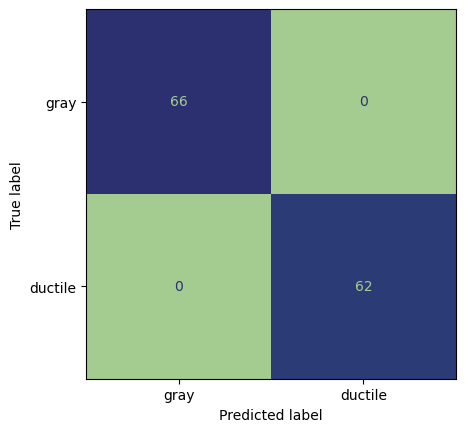

In [13]:
confusion_matrix = metrics.confusion_matrix(image_cluster, labels)
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix, 
    display_labels = ['gray', 'ductile'])

cm_display.plot(cmap="crest", colorbar=False);

**Author:** Jose H Chiriboga, Copyright © Jose H Chiriboga 2022. This notebook and its source code are released under the terms of the MIT License.